# Spatial relationships and operations

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

pd.options.display.max_rows = 10

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## Spatial relationships

An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more information.

![](img/TopologicSpatialRelations2.png)
(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

### Relationships between individual objects

Let's first create some small toy spatial objects:

A polygon <small>(note: we use `.squeeze()` here to to extract the scalar geometry object from the GeoSeries of length 1)</small>:

In [3]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze()

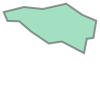

In [4]:
belgium

In [5]:
type(belgium)

shapely.geometry.polygon.Polygon

Two points:

In [6]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

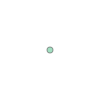

In [7]:
paris

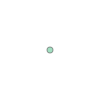

In [8]:
brussels

And a linestring:

In [9]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

In [10]:
type(line)

shapely.geometry.linestring.LineString

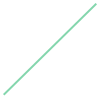

In [11]:
line

Let's visualize those 4 geometry objects together (I only put them in a GeoSeries to easily display them together with the geopandas `.plot()` method):

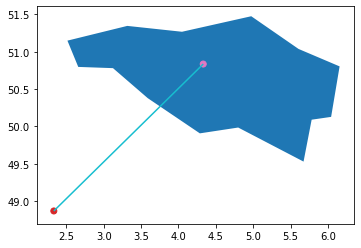

In [12]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

You can recognize the abstract shape of Belgium.

Brussels, the capital of Belgium, is thus located within Belgium. This is a spatial relationship, and we can test this using the individual shapely geometry objects as follow:

***

__Exercise:__ produced a similar figure as above that includes France, Spain, Paris, Madrid and a line that connects both capitals

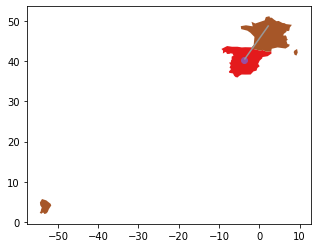

In [13]:
spain = countries.loc[countries['name'] == 'Spain', 'geometry'].squeeze()
madrid = cities.loc[cities['name'] == 'Madrid', 'geometry'].squeeze()
france = countries.loc[countries['name'] == 'France', 'geometry'].squeeze()

# plot the map
# paris was instantiate in the previous above cell
geopandas.GeoSeries( [spain, madrid, france, 
                      LineString([paris, madrid])] ).plot(cmap='Set1')
# examples of other discrete colormaps: tab10, tab20, Accent, Dark2, Paired, Pastel1, Set1, Set2


***

In [14]:
# query whether Brussels is within Belgium
brussels.within(belgium)

True

In [15]:
# is the city of Paris within Belgium polygon?
paris.within(belgium)

False

In [16]:
# using the reverse: does Belgium contain Brussels?
belgium.contains(brussels)

True

In [17]:
# does France contain Brussels?
france.contains(brussels)

False

On the other hand, Paris is not located in Belgium:

In [18]:
# does Belgium contain Paris?
belgium.contains(paris)

False

In [19]:
# does Paris contain Belgium?
paris.within(belgium)

False

The straight line we draw from Paris to Brussels is not fully located within Belgium, but it does intersect with it:

In [20]:
# does Belgium contain the line?
belgium.contains(line)

False

In [21]:
# Does line intersect with Belgium polgon?
line.intersects(belgium)

True

### Spatial relationships with GeoDataFrames

The same methods that are available on individual `shapely` geometries as we have seen above, are also available as methods on `GeoSeries` / `GeoDataFrame` objects.

For example, if we call the `contains` method on the world dataset with the `paris` point, it will do this spatial check for each country in the `world` dataframe:

In [22]:
countries.contains(paris)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

Because the above gives us a boolean result, we can use that to filter the dataframe:

In [23]:
countries[countries.contains(paris)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,(POLYGON ((2.513573032246114 51.14850617126189...


In [24]:
# alternatively
countries.query('name == "France"')

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,(POLYGON ((2.513573032246114 51.14850617126189...


And indeed, France is the only country in the world in which Paris is located.

Another example, extracting the linestring of the Amazon river in South America, we can query through which countries the river flows:

In [25]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

In [26]:
countries[countries.crosses(amazon)]  # or .intersects

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
22,BRA,Brazil,South America,207353391.0,3081000.0,"POLYGON ((-57.625133429583 -30.21629485445423,..."
35,COL,Colombia,South America,47698524.0,688000.0,POLYGON ((-66.87632585312258 1.253360500489336...
124,PER,Peru,South America,31036656.0,410400.0,POLYGON ((-69.52967810736496 -10.9517343075021...


<div class="alert alert-info" style="font-size:120%">
<b>REFERENCE</b>: <br><br>

Overview of the different functions to check spatial relationships (*spatial predicate functions*):

<ul>
  <li>`equals`</li>
  <li>`contains`</li>
  <li>`crosses`</li>
  <li>`disjoint`</li>
  <li>`intersects`</li>
  <li>`overlaps`</li>
  <li>`touches`</li>
  <li>`within`</li>
  <li>`covers`</li>
</ul>

<p>
See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.
<p></p>
See https://en.wikipedia.org/wiki/DE-9IM for all details on the semantics of those operations.
</p>
</div>

__Exercise:__ find all countries contiguous to brazil

In [27]:
# solutions
brazil = countries.query('name == "Brazil"')['geometry'].squeeze()

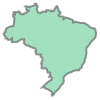

In [28]:
brazil

In [29]:
countries[countries.touches(brazil)] # or *.intersects

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
4,ARG,Argentina,South America,44293293.0,879400.0,(POLYGON ((-66.95992000000001 -54.896810000000...
21,BOL,Bolivia,South America,11138234.0,78350.0,POLYGON ((-62.68505713565789 -22.2490292294223...
35,COL,Colombia,South America,47698524.0,688000.0,POLYGON ((-66.87632585312258 1.253360500489336...
55,FRA,France,Europe,67106161.0,2699000.0,(POLYGON ((2.513573032246114 51.14850617126189...
67,GUY,Guyana,South America,737718.0,6093.0,POLYGON ((-56.53938574891455 1.899522609866921...
124,PER,Peru,South America,31036656.0,410400.0,POLYGON ((-69.52967810736496 -10.9517343075021...
131,PRY,Paraguay,South America,6943739.0,64670.0,POLYGON ((-54.62529069682358 -25.7392554664155...
148,SUR,Suriname,South America,591919.0,8547.0,POLYGON ((-54.52475419779972 2.311848863123814...
167,URY,Uruguay,South America,3360148.0,73250.0,POLYGON ((-58.42707414410439 -33.9094544410575...
170,VEN,Venezuela,South America,31304016.0,468600.0,POLYGON ((-60.73357418480372 5.200277207861901...


## Spatial operations

Next to the spatial predicates that return boolean values, Shapely and GeoPandas aslo provide analysis methods that return new geometric objects.

See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

For example, using the toy data from above, let's construct a buffer around Brussels (which returns a Polygon):

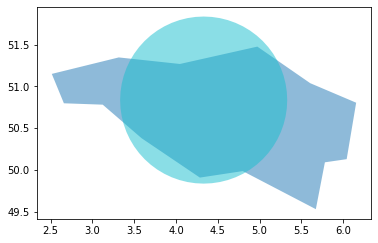

In [30]:
geopandas.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10') #alpha=0.5 is the degrees

In [31]:
brussels.buffer(1).to_crs(espg=31370)
# this will return an error: 'Polygon' object has no attribute 'to_crs'

AttributeError: 'Polygon' object has no attribute 'to_crs'

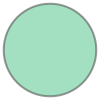

In [32]:
brussels.buffer(1)

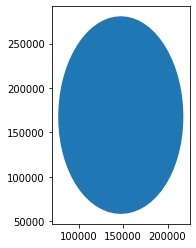

In [33]:
geopandas.GeoSeries(brussels.buffer(1), crs=cities.crs).to_crs(epsg=31370).plot()

and now take the intersection, union or difference of those two polygons:

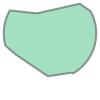

In [34]:
brussels.buffer(1).intersection(belgium)

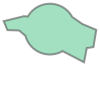

In [35]:
brussels.buffer(1).union(belgium)

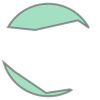

In [36]:
brussels.buffer(1).difference(belgium)

Another useful method is the `unary_union` attribute, which converts the set of geometry objects in a GeoDataFrame into a single geometry object by taking the union of all those geometries.

For example, we can construct a single object for the Africa continent:

In [37]:
africa_countries = countries[countries['continent'] == 'Africa']

In [38]:
africa_countries

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...
11,BDI,Burundi,Africa,11466756.0,7892.0,POLYGON ((29.33999759290035 -4.499983412294092...
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.691701694356254 6.258817246928629,..."
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.154473504249921 11.94015005131334,..."
25,BWA,Botswana,Africa,2214858.0,35900.0,POLYGON ((29.43218834810904 -22.09131275806759...
...,...,...,...,...,...,...
164,TZA,Tanzania,Africa,53950935.0,150600.0,POLYGON ((29.33999759290035 -4.499983412294092...
165,UGA,Uganda,Africa,39570125.0,84930.0,POLYGON ((29.57946618014088 -1.341313164885626...
174,ZAF,South Africa,Africa,54841552.0,739100.0,POLYGON ((19.89576785653443 -24.76779021576059...
175,ZMB,Zambia,Africa,15972000.0,65170.0,POLYGON ((23.21504845550606 -17.52311614346598...


In [39]:
africa = africa_countries.unary_union

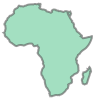

In [40]:
africa

In [41]:
print(str(africa)[:1000])

MULTIPOLYGON (((49.54351891459575 -12.46983285894055, 49.80898074727909 -12.89528492599955, 50.05651085795716 -13.55576140712198, 50.21743126811407 -14.7587887508768, 50.47653689962553 -15.22651213955054, 50.37711144389596 -15.70606943121913, 50.20027469259318 -16.00026336025677, 49.86060550313868 -15.41425261806692, 49.67260664246086 -15.71020354580248, 49.86334435405016 -16.45103687913878, 49.77456424337271 -16.8750420060936, 49.49861209493412 -17.10603565843827, 49.43561852397031 -17.95306406013437, 49.04179243347394 -19.11878101977445, 48.54854088724801 -20.49688811613413, 47.93074913919867 -22.39150115325108, 47.54772342305131 -23.78195891692852, 47.0957613462266 -24.94162973399045, 46.28247765481709 -25.17846282318411, 45.40950768411045 -25.60143442149309, 44.83357384621755 -25.34610116953894, 44.03972049334976 -24.98834522878231, 43.76376834491117 -24.46067717864999, 43.69777754087445 -23.5741163062506, 43.34565433123763 -22.77690398528387, 43.254187046081 -22.05741301848412, 43

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br><br>

GeoPandas (and Shapely for the individual objects) provides a whole lot of basic methods to analyse the geospatial data (distance, length, centroid, boundary, convex_hull, simplify, transform, ....), much more than the few that we can touch in this tutorial.


<ul>
  <li>An overview of all methods provided by GeoPandas can be found here: http://geopandas.readthedocs.io/en/latest/reference.html</li>
</ul>

</div>

